**ML Assignment 3**  
Build a neural network classifier to predict whether a bank customer will leave within the next 6 months, using an open-source dataset from Kaggle containing 10,000 samples and 14 features (e.g., CreditScore, Geography, Age).  
**Steps:**  
1. Read the dataset.  
2. Separate features and target, then split into training and test sets.  
3. Normalize the data.  
4. Initialize and build the model, implementing improvements.  
5. Output the accuracy score and confusion matrix.  
**Dataset Link:** [Kaggle Project](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

In [ ]:
# Import necesary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
# Load the dataset & explore the data
df  = pd.read_csv('Churn_Modelling.csv')

print("Data Shape:\n", df.shape)
print("Data Columns:", df.columns)

print("Data Head:\n")
df.head()

Data Shape:
 (10000, 14)
Data Columns: Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
Data Head:



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Checking for null values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# Split dataset into features & target
x = df[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard",
        "IsActiveMember", "EstimatedSalary"]]
y = df["Exited"]

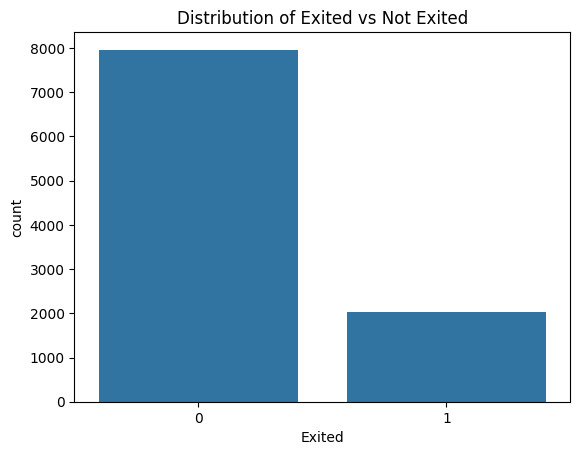

In [ ]:
# Visualize Class Distribution
sns.countplot(x = y)
plt.title("Distribution of Exited vs Not Exited")
plt.show()

In [ ]:
# Import libraries for implementing Neural Network Classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, ConfusionMatrixDisplay)
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Handle class imbalance using Random Over Sampler
ros = RandomOverSampler(random_state=0)
x_res, y_res = ros.fit_resample(x, y)

# Normalize data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_res)

In [ ]:
# Split data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_res, random_state=0)

ann = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=500, random_state=0, activation='relu')
ann.fit(x_train, y_train)

# Get predicted data
y_pred = ann.predict(x_test)

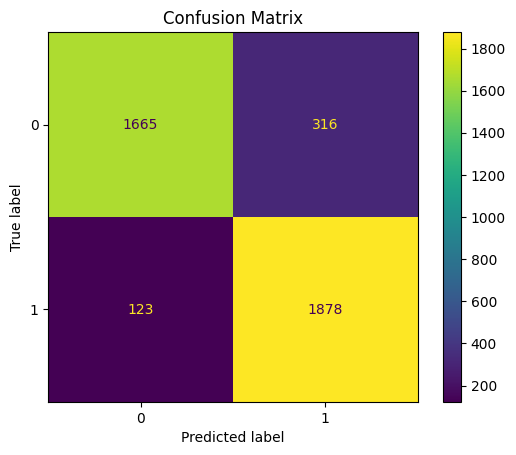

In [ ]:
# Visualizing Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Evaluate metrics
import math as m
def roundUp(value):
    return (m.floor(value * 1000)) / 1000

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

accScore = roundUp(accuracy_score(y_test, y_pred))
print("\n=================\nAccuracy: ", accScore, "=", accScore * 100, "%")

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1981
           1       0.86      0.94      0.90      2001

    accuracy                           0.89      3982
   macro avg       0.89      0.89      0.89      3982
weighted avg       0.89      0.89      0.89      3982


Accuracy:  0.889 = 88.9 %
